In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

Experimental Absolute Zero (Data Set 1): -207.71199323107487 +/- 26.725339136529303
Experimental Absolute Zero (Data Set 2): -99.03985591733112 +/- 41.06019028689964


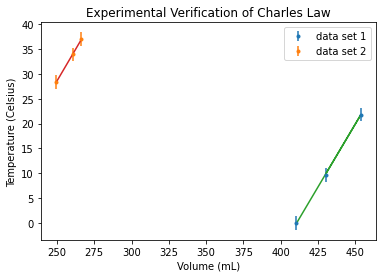

In [55]:
temp_final = np.array([0, 21.8, 9.7, 28.4, 33.9 ,37, 45.3])  # celsius
temp_initial = np.array([22.9]*7) # room temp (celsius)
temp_err = 1
volume_err = 1 + 4.15 * np.sqrt((0.0162/(3.25/2)**2)**2 + (0.01/(0.5+height_final))**2) - 0.09
y_err = np.sqrt(temp_err**2 + volume_err**2)

volume_at_zero = 208  # cm^3
area_of_chamber = np.pi*3.25**2
height_initial = np.array([75, 75, 75, 10, 10, 10, 19]) / 10
height_final = np.array([61, 74, 67, 12.5, 16, 17.5, 28]) / 10
volume_initial = volume_at_zero + area_of_chamber*height_initial
volume_final = volume_at_zero + area_of_chamber*height_final
plt.errorbar(volume_final[0:3], temp_final[0:3], label='data set 1', fmt='.', yerr=y_err[0:3])
plt.errorbar(volume_final[3:6], temp_final[3:6], label='data set 2', fmt='.', yerr=y_err[3:6])

# a_fit,cov=curve_fit(linearFunc,m,distance,sigma=yerr,absolute_sigma=True)
a_fit1, cov1 =curve_fit(linearFunc,volume_final[0:3],temp_final[0:3], sigma=y_err[0:3],absolute_sigma=True)
inter1 = a_fit1[0]
slope1 = a_fit1[1]
yfit1 = inter1 + volume_final[0:3]*slope1
plt.plot(volume_final[0:3],yfit1)

a_fit2, cov2 =curve_fit(linearFunc,volume_final[3:6],temp_final[3:6], sigma=y_err[3:6],absolute_sigma=True)
inter2 = a_fit2[0]
slope2 = a_fit2[1]
yfit2 = inter2 + volume_final[3:6]*slope2
plt.plot(volume_final[3:6],yfit2)
plt.legend()
plt.title('Experimental Verification of Charles Law')
plt.xlabel('Volume (mL)')
plt.ylabel('Temperature (Celsius)')


d_inter_1 = np.sqrt(cov1[0][0])
d_slope_1 = np.sqrt(cov1[1][1])
d_final_1 = np.sqrt(d_inter_1**2+(d_slope_1*volume_final[0])**2)

d_inter_2 = np.sqrt(cov2[0][0])
d_slope_2 = np.sqrt(cov2[1][1])
d_final_2 = np.sqrt(d_inter_2**2+(d_slope_2*volume_final[3])**2)

print(f'Experimental Absolute Zero (Data Set 1): {inter1} +/- {d_final_1}')
print(f'Experimental Absolute Zero (Data Set 2): {inter2} +/- {d_final_2}')

Experimental Absolute Zero (Data Set 1): -207.71199323107487 +/- 26.725339136529303
Experimental Absolute Zero (Data Set 2): -99.03985591733112 +/- 41.06019028689964
